# Density Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import scipy.stats as sc
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('heights.txt', header=None, usecols=[1], sep='\t')
df.columns = ['height']

In [3]:
df.head()

,height
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [8]:
# samples generated with replacement to satisfy i.i.d assumption
hundered_sample = np.random.choice(df['height'], 100, replace=True)
five_hundred_sample = np.random.choice(df['height'], 500, replace=True)
thousand_sample = np.random.choice(df['height'], 1000, replace=True)

# MLE

Text(0.5, 1.0, 'height distribution')

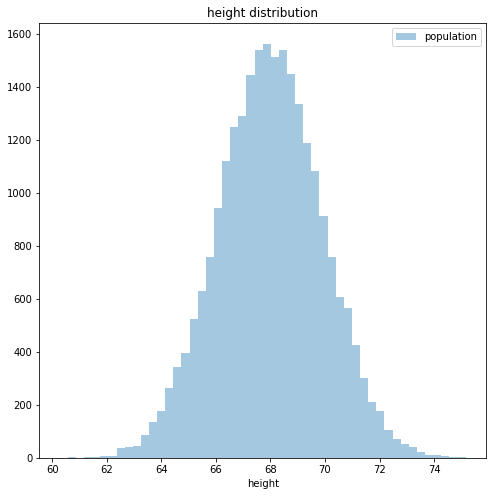

In [5]:
plt.figure(figsize=(8, 8))
sns.distplot(df['height'], kde=False, label='population')
plt.legend()
plt.title('height distribution')

In [6]:
hundred_mean, hundered_var = np.mean(hundered_sample), np.var(hundered_sample)
five_hundred_mean, five_hundred_var = np.mean(five_hundred_sample), np.var(five_hundred_sample)
thousand_mean, thousand_var = np.mean(thousand_sample), np.var(thousand_sample)

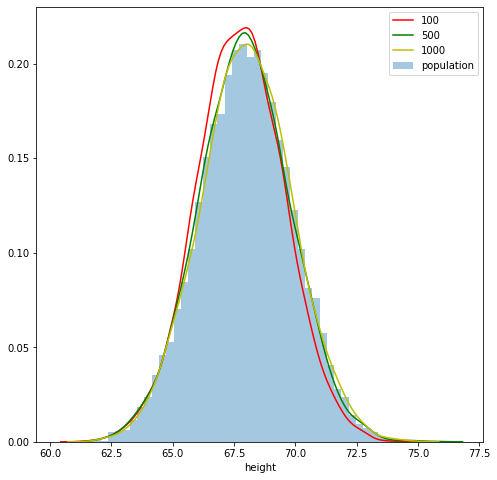

In [7]:
plt.figure(figsize=(8, 8))
sns.distplot(df['height'], kde=False, label='population', norm_hist=True)
sns.distplot(np.random.normal(hundred_mean, hundered_var**0.5, 10000), hist=False, label='100', color='r')
sns.distplot(np.random.normal(five_hundred_mean, five_hundred_var**0.5, 10000), hist=False, label='500', color='g')
sns.distplot(np.random.normal(thousand_mean, thousand_var**0.5, 10000), hist=False, label='1000', color='y')

# ECDF

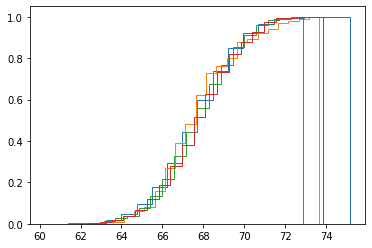

In [9]:
n_bins = 20
n_pop, bins_pop, _ = plt.hist(df['height'], n_bins, density=True, histtype='step',
                           cumulative=True, label='population')
n_100, bins_100, _ = plt.hist(hundered_sample, n_bins, density=True, histtype='step',
                           cumulative=True, label='100')
n_500, bins_500, _ = plt.hist(five_hundred_sample, n_bins, density=True, histtype='step',
                           cumulative=True, label='500')
n_1000, bins_1000, _ = plt.hist(thousand_sample, n_bins, density=True, histtype='step',
                           cumulative=True, label='1000')

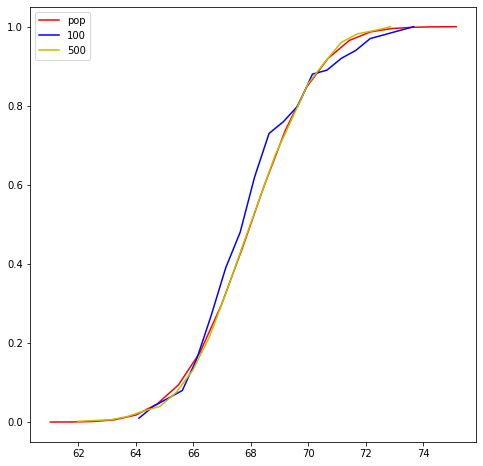

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(bins_pop[1:], n_pop, color='r', label='pop')
plt.plot(bins_100[1:], n_100, color='b', label='100')
plt.plot(bins_500[1:], n_500, color='y', label='500')
plt.legend()

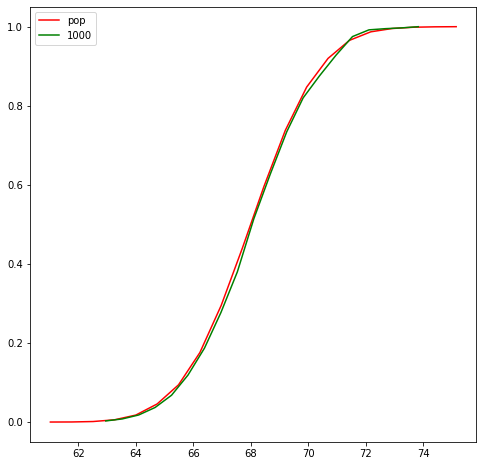

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(bins_pop[1:], n_pop, color='r', label='pop')
plt.plot(bins_1000[1:], n_1000, color='g', label='1000')
plt.legend()

# KDE

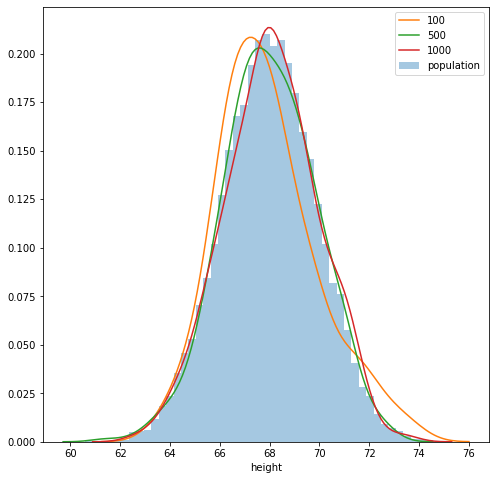

In [12]:
plt.figure(figsize=(8, 8))
sns.distplot(df['height'], kde=False, label='population', norm_hist=True)
sns.kdeplot(hundered_sample, kernel='gau', label='100')
sns.kdeplot(five_hundred_sample, kernel='gau', label='500')
sns.kdeplot(thousand_sample, kernel='gau', label='1000')
plt.legend()

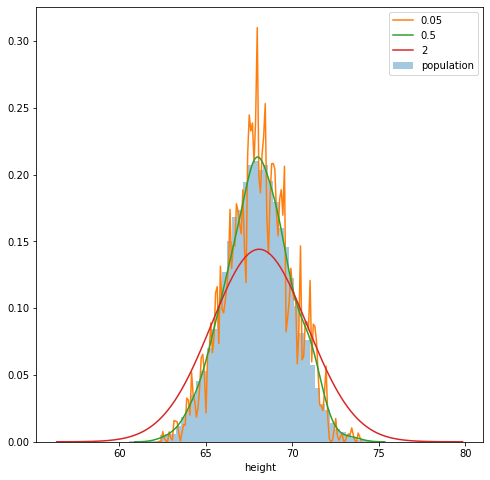

In [13]:
plt.figure(figsize=(8, 8))
sns.distplot(df['height'], kde=False, label='population', norm_hist=True)
sns.kdeplot(thousand_sample, kernel='gau', bw=0.05, label='0.05')
sns.kdeplot(thousand_sample, kernel='gau', bw=0.5, label='0.5')
sns.kdeplot(thousand_sample, kernel='gau', bw=2, label='2')
plt.legend()

# Q-Q plot

Text(0, 0.5, 'height quants')

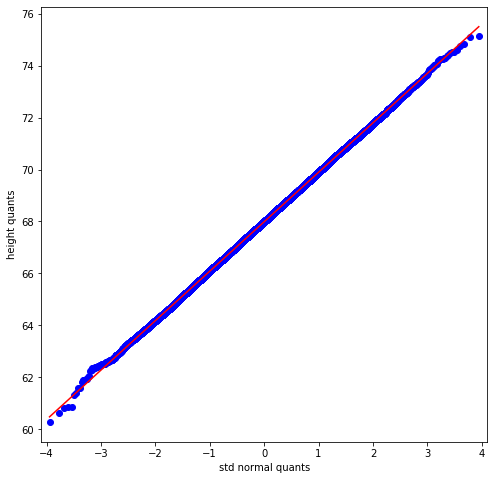

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(df['height'], line='q', ax=ax)
plt.xlabel("std normal quants")
plt.ylabel("height quants")

# Implicit Density Estimation

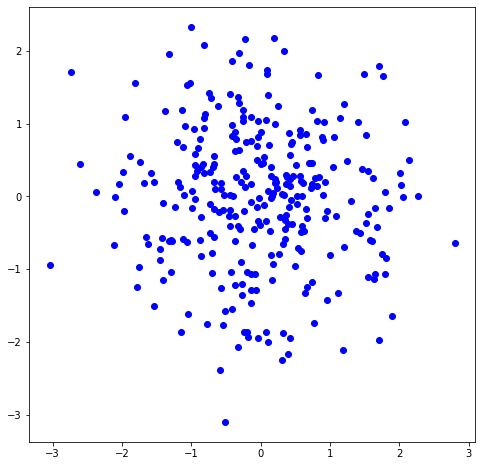

In [16]:
bi_normal = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=300)
plt.figure(figsize=(8, 8))
plt.scatter(bi_normal[:, 0], bi_normal[:, 1], color='b')

f(x) = x/10 + x/||x||

In [17]:
bi_normal_norm = np.linalg.norm(bi_normal, axis=1)
out = np.zeros_like(bi_normal)
out[:, 0] = bi_normal[:, 0] / 10 + bi_normal[:, 0] / bi_normal_norm
out[:, 1] = bi_normal[:, 1] / 10 + bi_normal[:, 1] / bi_normal_norm

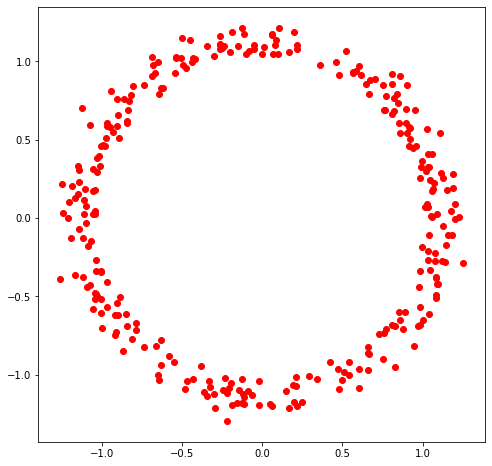

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(out[:, 0], out[:, 1], color='r')